# **VIDEO GAME ANALYSIS**

## SUMMARY

In this project, I conducted some statistical analysis on the video game dataset - obtained from Kaggle and web scrapping VGCharts to get details on the total number of times video game was played (from Kaggle) and the amount of times the game was shipped (VGChartz), Genres, publisher, consoles (from Kaggle) and release date from VGChartz. 
The initial dataset consisted of over 65,000+ rows and I cleaned the data to remove all missing data, kept only the data that had details in both the databases. The final database had about 1000+ rows and have been further cleaned up as appropriate. 

The main purpose of this analysis was to answer a few questions that I had while looking at the data. 

1. What are the most popular video games of all time?
2. How does the popularity of a video game vary across different platforms, genres and publishers?
3. What are the characterstics of the most successful video games, such as their release date, developer, genre and ratings?
4. Can we predict the success or sales of a video game based on its features like genre, platform, developer and rating?
5. What is the quarter where most games are shipped?




### What are the most popular video games of all time, and how has their popularity chaed over time?

In [1]:
#STEP1 - LOADING THE DATASET INTO PANDAS AND IMPORTING LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('games.csv')
df

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,25-Feb-22,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,10-Dec-19,['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,3-Mar-17,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,15-Sep-15,"['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,24-Feb-17,['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1507,Back to the Future: The Game,22-Dec-10,['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,1508,Team Sonic Racing,21-May-19,"['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,1509,Dragon's Dogma,22-May-12,['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1510,1510,Baldur's Gate 3,6-Oct-20,['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602


In [2]:
#listing out the columns in the df. 
df.columns

Index(['Unnamed: 0', 'Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist'],
      dtype='object')

### **DATA CLEANING** - Total Plays for the game would be Plays + playing + backlogs

The dataset came from Kaggle/Backloggd and per their terminology - Plays would be the total number of completed plays, Playing would be the total number of people still playing the game, Backlogged is people who bought the game but have not finished it and Waitlisted would be the number of people who have shown interest in the game and have not purchased it. For the sake of this analysis, we will consider 'Global_Sales' as a new column which = Plays + Playing + Backlogged




**On the next cell, we are going to create a new column called "Global_Plays" which would be the total of Plays, Playing and Backlogged.**

From there, we will remove the columns we do not care about and keep only the columns we want. 

### **PROBLEM STATEMENT**

If you look at the Plays and Playing and Backlogs details from the last cell run, they have values such as '17K' and they are all formatted as a string rather than int or float. The issue with this is when we try running the cell that computes ['Global_Plays'] it gives us an output that is addition of the string rather than the actual total number of plays. In order to fix that, the cell below will run a function to get rid of the K and multiply the data with 1000 which would then enable us to run some numerical analysis. 

The next cell takes care of the Ks and cleans up the data to represent the numerical data as a float rather than string/object.

In [3]:
df['Plays'] = df['Plays'].apply(lambda x: float(x.replace('K','')) * 1000 if x.endswith('K') else float(x))
df['Playing'] = df['Playing'].apply(lambda x: float(x.replace('K','')) * 1000 if x.endswith('K') else float(x))
df['Backlogs'] = df['Backlogs'].apply(lambda x: float(x.replace('K','')) * 1000 if x.endswith('K') else float(x))

print(df.dtypes)



Unnamed: 0             int64
Title                 object
Release Date          object
Team                  object
Rating               float64
Times Listed          object
Number of Reviews     object
Genres                object
Summary               object
Reviews               object
Plays                float64
Playing              float64
Backlogs             float64
Wishlist              object
dtype: object


In [4]:
df

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,25-Feb-22,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000.0,3800.0,4600.0,4.8K
1,1,Hades,10-Dec-19,['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000.0,3200.0,6300.0,3.6K
2,2,The Legend of Zelda: Breath of the Wild,3-Mar-17,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000.0,2500.0,5000.0,2.6K
3,3,Undertale,15-Sep-15,"['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000.0,679.0,4900.0,1.8K
4,4,Hollow Knight,24-Feb-17,['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000.0,2400.0,8300.0,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1507,Back to the Future: The Game,22-Dec-10,['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763.0,5.0,223.0,67
1508,1508,Team Sonic Racing,21-May-19,"['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1500.0,49.0,413.0,107
1509,1509,Dragon's Dogma,22-May-12,['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1100.0,45.0,487.0,206
1510,1510,Baldur's Gate 3,6-Oct-20,['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269.0,79.0,388.0,602


For the next step, we will group the dataset by title and find out the total plays of the game by calling it game_plays. We are going to add Plays, Playing, Backlogs into a new column called as Global_Plays.

In [5]:
df['Global_Plays'] = df['Plays']+ df['Playing'] + df['Backlogs']
#df.columns

In [6]:
#Grouping the dataset by the video gam title and the total plays?
game_plays = df.groupby('Title')['Global_Plays'].sum().reset_index()
game_plays

,Title,Global_Plays
0,100% Orange Juice,2143.0
1,13 Sentinels: Aegis Rim,7466.0
2,428: Shibuya Scramble,1763.0
3,A Hat in Time,10220.0
4,A Plague Tale: Innocence,24606.0
...,...,...
1094,Zelda II: The Adventure of Link,5655.0
1095,"Zero Escape: Nine Hours, Nine Persons, Nine Doors",8062.0
1096,Zero Escape: Zero Time Dilemma,4164.0
1097,ZeroRanger,1013.0


Next, we need to check if there are any duplicate data in the Title, to make sure we are not double counting any game titles. 

**ANALYSIS** 

We are going to print out any duplicates that the dataframe has and if there are no duplicates, we will print out that "There are no duplicates in the dataframe"

In [7]:
duplicates = game_plays[game_plays.duplicated(['Title'], keep= False)]
if len(duplicates) > 0:
    print('There are duplicates in the dataframe:')
    print(duplicates)
else:
    print('There are no duplicates in the dataframe')

There are no duplicates in the dataframe


Since we have made sure that there are no duplicates in the df, we can move forward with the rest of our analysis. 


In [8]:
game_plays = game_plays.sort_values('Global_Plays', ascending = False)
game_plays = game_plays.reset_index(drop=True)
#Setting the column Global_Plays to float format in order to display numbers in numeric format. 
pd.options.display.float_format = '{:.2f}'.format
game_plays

,Title,Global_Plays
0,Minecraft,119621.00
1,The Legend of Zelda: Breath of the Wild,112500.00
2,Doom,108462.00
3,Grand Theft Auto V,102087.00
4,Undertale,100737.00
...,...,...
1094,Elden Ring: Shadow of the Erdtree,40.00
1095,Better Call Saul Kart,37.00
1096,Megami Ibunroku Persona,29.00
1097,Pac-Man in a Tin,2.00


As you can see above, Elden Ring: Shadow of the Erdtree - shows up in Global_Plays even though it has not been released yet. For the next steps, in order to clean this even better, I will add the release_year column back into the dataframe to exclude all the future releases for an accurate representation. 

In [9]:
game_plays_date = pd.merge(game_plays[['Title', 'Global_Plays']], df[['Title','Release Date']], on = 'Title')
#Setting the column Global_Plays to float format in order to display numbers in numeric format. 
pd.options.display.float_format = '{:.2f}'.format
game_plays_date

,Title,Global_Plays,Release Date
0,Minecraft,119621.00,18-Nov-11
1,Minecraft,119621.00,18-Nov-11
2,Minecraft,119621.00,18-Nov-11
3,Minecraft,119621.00,20-Sep-17
4,The Legend of Zelda: Breath of the Wild,112500.00,3-Mar-17
...,...,...,...
1507,Elden Ring: Shadow of the Erdtree,40.00,NaN
1508,Better Call Saul Kart,37.00,30-Sep-22
1509,Megami Ibunroku Persona,29.00,20-Sep-96
1510,Pac-Man in a Tin,2.00,22-Mar-23


I see that the number of rows increased here, so I am going to copy the duplicates code from the previous cells and modify it to see if we have something duplicated. 

In [10]:
dupes = game_plays_date[game_plays_date.duplicated(['Title'], keep= False)]
if len(dupes) > 0:
    print('There are duplicates in the dataframe:')
    print(dupes)
else:
    print('There are no duplicates in the dataframe')

There are duplicates in the dataframe:
                                            Title  Global_Plays Release Date
0                                       Minecraft     119621.00    18-Nov-11
1                                       Minecraft     119621.00    18-Nov-11
2                                       Minecraft     119621.00    18-Nov-11
3                                       Minecraft     119621.00    20-Sep-17
4         The Legend of Zelda: Breath of the Wild     112500.00     3-Mar-17
...                                           ...           ...          ...
1338  Attack of the Friday Monsters! A Tokyo Tale       1600.00    17-Jul-13
1370    Nier: Automata - The End of Yorha Edition       1338.00     6-Oct-22
1371    Nier: Automata - The End of Yorha Edition       1338.00     6-Oct-22
1420                              Chaos;Head Noah        974.00    26-Feb-09
1421                              Chaos;Head Noah        974.00    26-Feb-09

[692 rows x 3 columns]


I will create another dataframe to hold on to the non duplicated values

In [11]:
game_plays2 = game_plays_date.drop_duplicates(subset = ['Title'])
game_plays2 = game_plays2.reset_index(drop = True)

#Setting the column Global_Plays to float format in order to display numbers in numeric format. 
pd.options.display.float_format = '{:.2f}'.format
game_plays2

,Title,Global_Plays,Release Date
0,Minecraft,119621.00,18-Nov-11
1,The Legend of Zelda: Breath of the Wild,112500.00,3-Mar-17
2,Doom,108462.00,12-May-16
3,Grand Theft Auto V,102087.00,17-Sep-13
4,Undertale,100737.00,15-Sep-15
...,...,...,...
1094,Elden Ring: Shadow of the Erdtree,40.00,NaN
1095,Better Call Saul Kart,37.00,30-Sep-22
1096,Megami Ibunroku Persona,29.00,20-Sep-96
1097,Pac-Man in a Tin,2.00,22-Mar-23


All Cleaned! Now, we are back at 1099 rows. Next step is to filter out all the dates for the games that have not yet released. We can do that by removing out the NaN values on the Release Date first and then we could filter by the games that have released prior to today (For me, it is April 16th, 2023). 

First, I am going to find out how many NaN values we have on the Release Date column in the database


In [12]:
num_NaN = game_plays2['Release Date'].isna().sum()
num_NaN

3

In [13]:
game_plays2_clean = game_plays2.dropna(subset = ['Release Date'])
game_plays2_clean.dtypes

Title            object
Global_Plays    float64
Release Date     object
dtype: object

Looks correct to me, we had 1099 rows of data and 3 of them were NaN, based on that - we should only have 1096 rows, which matches the output. 

For the next steps, I am going to filter out the dates that are in the future. While running this analysis - I am running it as of April 16, 2023. So, the results might be different for someone running this in the future if there are any games releasing after April 16th. 

In [14]:
from datetime import datetime
#Create a copy of the game_plays2_clean dataframe to work on
df_copy = game_plays2_clean.copy()
df_copy

# use datetime to convert the Release_Date column to datetime format
df_copy['Release Date'] = df_copy['Release Date'].apply(lambda x: datetime.strptime(x, '%d-%b-%y'))

# get today's date
today = datetime.today()

# use .loc to filter out the rows where the Release_Date is in the future
filtered_df = df_copy.loc[df_copy['Release Date'] <= today].copy()

# change the format of the Release_Date column to DD-MMM-YY
filtered_df.loc[:,'Release Date'] = filtered_df['Release Date'].apply(lambda x: x.strftime('%d-%b-%y'))

# reset the index
filtered_df = filtered_df.reset_index(drop = True)

#Setting the column Global_Plays to float format in order to display numbers in numeric format. 
pd.options.display.float_format = '{:.2f}'.format

filtered_df


,Title,Global_Plays,Release Date
0,Minecraft,119621.00,18-Nov-11
1,The Legend of Zelda: Breath of the Wild,112500.00,03-Mar-17
2,Doom,108462.00,12-May-16
3,Grand Theft Auto V,102087.00,17-Sep-13
4,Undertale,100737.00,15-Sep-15
...,...,...,...
1081,Phantom Brigade,56.00,28-Feb-23
1082,Better Call Saul Kart,37.00,30-Sep-22
1083,Megami Ibunroku Persona,29.00,20-Sep-96
1084,Pac-Man in a Tin,2.00,22-Mar-23


As of April 16th, the data does not include - Star Wars Jedi: Survivor! which releases on April 28th. When you run the data, I do not expect anything to change other than the total number of games released as of today. As of April 16th, I see 1086 games that are on the df that have been released and that is what I will be working with. Depending on when you run, you would either see 1086 games or 1087 games. 

**Let us run the code from above again - to find the games that were played the most!**

In [15]:
game_most_plays = filtered_df.sort_values('Global_Plays', ascending = False)
game_most_plays = game_most_plays.reset_index(drop = True)

pd.options.display.float_format = '{:.2f}'.format
game_most_plays

,Title,Global_Plays,Release Date
0,Minecraft,119621.00,18-Nov-11
1,The Legend of Zelda: Breath of the Wild,112500.00,03-Mar-17
2,Doom,108462.00,12-May-16
3,Grand Theft Auto V,102087.00,17-Sep-13
4,Undertale,100737.00,15-Sep-15
...,...,...,...
1081,Phantom Brigade,56.00,28-Feb-23
1082,Better Call Saul Kart,37.00,30-Sep-22
1083,Megami Ibunroku Persona,29.00,20-Sep-96
1084,Pac-Man in a Tin,2.00,22-Mar-23


Now, we can use some graphs for some data visualization. We are going to plot top 10 most played games using a barchart to see what game was the most played. 

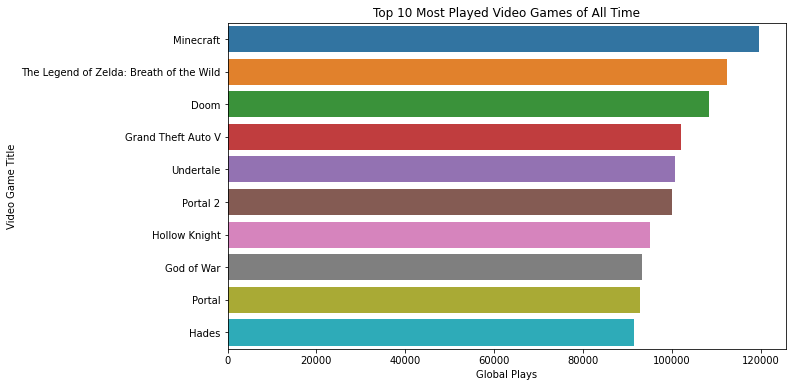

In [16]:
#Plot the top 10 games by plays using a bar chart
top_games = game_most_plays.head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Global_Plays', y='Title', data=top_games)
plt.xlabel('Global Plays')
plt.ylabel('Video Game Title')
plt.title('Top 10 Most Played Video Games of All Time')
plt.show()

Based on the Analysis, the top 10 played games are : Minecraft, Legend of Zelda: BOTW, Doom, Grand Theft Auto V, Undertale, Portal 2, Hollow Knight, God of War, Portal and Hades. 
        
        
Now that we have the top 10 played games, our next step includes trying to analyse the factors that might influence the popularity of games. 


For the remaining analysis, I have imported another dataframe that we extracted by webscrapping. The actual webscrapping was taking too long to load due to the amount of data, so I saved it as game_shipped.csv after cleaning the dataset by removing rows and columns with missing data. 

In [17]:
total_shipped_df = pd.read_csv('game_shipped.csv')


pd.options.display.float_format = '{:.2f}'.format
total_shipped_df

,position,game,console,publisher,developer,total_shipped,release_date
0,1,Tetris,Series,The Tetris Company,Alexey Pajitnov,496400000.00,01st Jan 88
1,2,Pokemon,Series,Nintendo,Game Freak,464840000.00,28th Sep 98
2,3,Call of Duty,Series,Activision,Infinity Ward,400000000.00,29th Oct 03
3,4,Super Mario,Series,Nintendo,Nintendo,398510000.00,20th Jul 83
4,5,Grand Theft Auto,Series,Rockstar Games,Rockstar North,395000000.00,27th Mar 98
...,...,...,...,...,...,...,...
4207,21832,Horizon V,All,Gebelli Software,Gebelli Software,10000.00,01st Jan 82
4208,21833,Asylum,PC,Unknown,William F. Denman Jr.,10000.00,N/A
4209,21834,DragonQuest,All,Enix,Simulations Publications,10000.00,27th May 86
4210,21836,Pac Attack,PC,Unknown,Computerware,10000.00,N/A


I am going to rename the column 'game' as 'Title' so that it is easier for me to merge later on based on the column Title. 

In [18]:
#Column name for title is as game on the total_shipped_df; changing it to title to make it easier to merge
total_shipped_df.rename(columns = {'game' : 'Title'}, inplace = True)
pd.options.display.float_format = '{:.2f}'.format
total_shipped_df

,position,Title,console,publisher,developer,total_shipped,release_date
0,1,Tetris,Series,The Tetris Company,Alexey Pajitnov,496400000.00,01st Jan 88
1,2,Pokemon,Series,Nintendo,Game Freak,464840000.00,28th Sep 98
2,3,Call of Duty,Series,Activision,Infinity Ward,400000000.00,29th Oct 03
3,4,Super Mario,Series,Nintendo,Nintendo,398510000.00,20th Jul 83
4,5,Grand Theft Auto,Series,Rockstar Games,Rockstar North,395000000.00,27th Mar 98
...,...,...,...,...,...,...,...
4207,21832,Horizon V,All,Gebelli Software,Gebelli Software,10000.00,01st Jan 82
4208,21833,Asylum,PC,Unknown,William F. Denman Jr.,10000.00,N/A
4209,21834,DragonQuest,All,Enix,Simulations Publications,10000.00,27th May 86
4210,21836,Pac Attack,PC,Unknown,Computerware,10000.00,N/A


In [19]:
#Checking the columns for the databases
print(game_most_plays.columns)
print(total_shipped_df.columns)

Index(['Title', 'Global_Plays', 'Release Date'], dtype='object')
Index(['position', 'Title', 'console', 'publisher', 'developer',
       'total_shipped', 'release_date'],
      dtype='object')


In [20]:
pd.options.display.float_format = '{:.2f}'.format
# Merge the two dataframes on the 'Title' column
merged_shipped_df = pd.merge(game_most_plays, total_shipped_df, on='Title', how='inner')


# Print the merged dataframe
merged_shipped_df


,Title,Global_Plays,Release Date,position,console,publisher,developer,total_shipped,release_date
0,Minecraft,119621.00,18-Nov-11,7,Series,Mojang,Mojang,238000000.00,18th Nov 11
1,Minecraft,119621.00,18-Nov-11,8,All,Mojang,Mojang AB,238000000.00,18th Nov 11
2,Minecraft,119621.00,18-Nov-11,92,PC,Mojang,Mojang AB,33150000.00,10th May 10
3,Minecraft,119621.00,18-Nov-11,296,X360,Microsoft Studios,Mojang,13000000.00,04th Jun 13
4,The Legend of Zelda: Breath of the Wild,112500.00,03-Mar-17,104,All,Nintendo,Nintendo,30700000.00,03rd Mar 17
...,...,...,...,...,...,...,...,...,...
708,Guitar Hero 5,1165.00,01-Sep-09,3526,All,Activision,Neversoft,1000000.00,01st Sep 09
709,System Shock,1145.00,22-Sep-94,11245,PC,Origin Systems,Looking Glass Studios,170000.00,01st Jan 94
710,Digimon Survive,1127.00,28-Jul-22,5906,All,Bandai Namco Entertainment,Hyde,500000.00,29th Jul 22
711,La-Mulana,996.00,13-Jul-12,10576,PC,GR3 Project,GR3 Project,190000.00,27th May 05


In [21]:
#print all the columns in merged_shipped_df
merged_shipped_df.columns

Index(['Title', 'Global_Plays', 'Release Date', 'position', 'console',
       'publisher', 'developer', 'total_shipped', 'release_date'],
      dtype='object')

In [22]:
#I want to add the genre back from the first dataframe that we imported - the one used for game_plays. 
#I might also want to add the rating?
pd.options.display.float_format = '{:.2f}'.format
# Select the columns 'Title', 'ratings' and 'genre' from the 'df' dataframe
df_subset = df[['Title', 'Rating', 'Genres']]

# Merge the 'df_subset' dataframe with the 'merged_shipped_df' dataframe based on the 'Title' column
merged_shipped_w_df = pd.merge(merged_shipped_df, df_subset, on='Title', how='inner')


merged_shipped_w_df


,Title,Global_Plays,Release Date,position,console,publisher,developer,total_shipped,release_date,Rating,Genres
0,Minecraft,119621.00,18-Nov-11,7,Series,Mojang,Mojang,238000000.00,18th Nov 11,4.30,"['Adventure', 'Simulator']"
1,Minecraft,119621.00,18-Nov-11,7,Series,Mojang,Mojang,238000000.00,18th Nov 11,4.30,"['Adventure', 'Simulator']"
2,Minecraft,119621.00,18-Nov-11,7,Series,Mojang,Mojang,238000000.00,18th Nov 11,4.30,"['Adventure', 'Simulator']"
3,Minecraft,119621.00,18-Nov-11,7,Series,Mojang,Mojang,238000000.00,18th Nov 11,4.20,"['Adventure', 'Simulator']"
4,Minecraft,119621.00,18-Nov-11,8,All,Mojang,Mojang AB,238000000.00,18th Nov 11,4.30,"['Adventure', 'Simulator']"
...,...,...,...,...,...,...,...,...,...,...,...
1150,Guitar Hero 5,1165.00,01-Sep-09,3526,All,Activision,Neversoft,1000000.00,01st Sep 09,3.20,['Music']
1151,System Shock,1145.00,22-Sep-94,11245,PC,Origin Systems,Looking Glass Studios,170000.00,01st Jan 94,3.90,"['RPG', 'Shooter']"
1152,Digimon Survive,1127.00,28-Jul-22,5906,All,Bandai Namco Entertainment,Hyde,500000.00,29th Jul 22,3.40,"['Adventure', 'RPG', 'Simulator', 'Strategy', ..."
1153,La-Mulana,996.00,13-Jul-12,10576,PC,GR3 Project,GR3 Project,190000.00,27th May 05,3.90,"['Adventure', 'Indie', 'Platform', 'Puzzle']"


In [23]:
##Checking to see if there are any missing values?

merged_shipped_w_df.isnull().sum()
#looks like thereis no missing values

Title            0
Global_Plays     0
Release Date     0
position         0
console          0
publisher        0
developer        0
total_shipped    0
release_date     0
Rating           0
Genres           0
dtype: int64

In [24]:
#I am worried that there are duplicates or NaN values since the previous database had 713 rows and the new one has 1155 rows: 

#Let us check for duplicates: 

merged_shipped_w_df.duplicated().sum()

408

In [25]:
#looks like we have 408 duplicates, let us try looking into it to make sure they are duplicates and if we could remove those to clean the dataframe. 
pd.options.display.float_format = '{:.2f}'.format
duplicates_shipped = merged_shipped_w_df[merged_shipped_w_df.duplicated()]
duplicates_shipped = duplicates_shipped.reset_index(drop= True)
duplicates_shipped


,Title,Global_Plays,Release Date,position,console,publisher,developer,total_shipped,release_date,Rating,Genres
0,Minecraft,119621.00,18-Nov-11,7,Series,Mojang,Mojang,238000000.00,18th Nov 11,4.30,"['Adventure', 'Simulator']"
1,Minecraft,119621.00,18-Nov-11,7,Series,Mojang,Mojang,238000000.00,18th Nov 11,4.30,"['Adventure', 'Simulator']"
2,Minecraft,119621.00,18-Nov-11,8,All,Mojang,Mojang AB,238000000.00,18th Nov 11,4.30,"['Adventure', 'Simulator']"
3,Minecraft,119621.00,18-Nov-11,8,All,Mojang,Mojang AB,238000000.00,18th Nov 11,4.30,"['Adventure', 'Simulator']"
4,Minecraft,119621.00,18-Nov-11,92,PC,Mojang,Mojang AB,33150000.00,10th May 10,4.30,"['Adventure', 'Simulator']"
...,...,...,...,...,...,...,...,...,...,...,...
403,Bloodstained: Curse of the Moon,6282.00,23-May-18,8209,NS,Inti Creates,Inti Creates,300000.00,24th May 18,3.60,"['Adventure', 'Indie', 'Platform']"
404,Fire Emblem Warriors: Three Hopes,4332.00,24-Jun-22,3501,NS,Nintendo,Omega Force,1000000.00,24th Jun 22,3.60,"['Brawler', 'RPG', 'Simulator', 'Strategy', 'T..."
405,Monster Hunter Rise: Sunbreak,3388.00,29-Jun-22,769,All,Capcom,Capcom,5000000.00,30th Jun 22,4.30,"['Brawler', 'RPG']"
406,Fire Emblem: Thracia 776,3312.00,01-Sep-99,13007,SNES,Nintendo,Intelligent Systems,120000.00,01st Sep 99,4.10,"['RPG', 'Strategy', 'Tactical']"


In [26]:
#let us drop the rows if all the values in columns are same. From the first glance, I can see that there are duplicates, but some rows are legit due to the game being multiplatformer. 

merged_shipped_w_df.drop_duplicates(keep='first', inplace=True)

In [27]:
pd.options.display.float_format = '{:.2f}'.format
##now we only have the data without duplicates. I see Genres having a list of Genres. I am going 
merged_shipped_w_df = merged_shipped_w_df.reset_index(drop = True)
merged_shipped_w_df

,Title,Global_Plays,Release Date,position,console,publisher,developer,total_shipped,release_date,Rating,Genres
0,Minecraft,119621.00,18-Nov-11,7,Series,Mojang,Mojang,238000000.00,18th Nov 11,4.30,"['Adventure', 'Simulator']"
1,Minecraft,119621.00,18-Nov-11,7,Series,Mojang,Mojang,238000000.00,18th Nov 11,4.20,"['Adventure', 'Simulator']"
2,Minecraft,119621.00,18-Nov-11,8,All,Mojang,Mojang AB,238000000.00,18th Nov 11,4.30,"['Adventure', 'Simulator']"
3,Minecraft,119621.00,18-Nov-11,8,All,Mojang,Mojang AB,238000000.00,18th Nov 11,4.20,"['Adventure', 'Simulator']"
4,Minecraft,119621.00,18-Nov-11,92,PC,Mojang,Mojang AB,33150000.00,10th May 10,4.30,"['Adventure', 'Simulator']"
...,...,...,...,...,...,...,...,...,...,...,...
742,Guitar Hero 5,1165.00,01-Sep-09,3526,All,Activision,Neversoft,1000000.00,01st Sep 09,3.20,['Music']
743,System Shock,1145.00,22-Sep-94,11245,PC,Origin Systems,Looking Glass Studios,170000.00,01st Jan 94,3.90,"['RPG', 'Shooter']"
744,Digimon Survive,1127.00,28-Jul-22,5906,All,Bandai Namco Entertainment,Hyde,500000.00,29th Jul 22,3.40,"['Adventure', 'RPG', 'Simulator', 'Strategy', ..."
745,La-Mulana,996.00,13-Jul-12,10576,PC,GR3 Project,GR3 Project,190000.00,27th May 05,3.90,"['Adventure', 'Indie', 'Platform', 'Puzzle']"


In [28]:
pd.options.display.float_format = '{:.2f}'.format
merged_shipped_w_df['mean_ratings'] = merged_shipped_w_df.groupby(['Title', 'console', 'release_date'])['Rating'].transform('mean')
merged_shipped_w_df

,Title,Global_Plays,Release Date,position,console,publisher,developer,total_shipped,release_date,Rating,Genres,mean_ratings
0,Minecraft,119621.00,18-Nov-11,7,Series,Mojang,Mojang,238000000.00,18th Nov 11,4.30,"['Adventure', 'Simulator']",4.25
1,Minecraft,119621.00,18-Nov-11,7,Series,Mojang,Mojang,238000000.00,18th Nov 11,4.20,"['Adventure', 'Simulator']",4.25
2,Minecraft,119621.00,18-Nov-11,8,All,Mojang,Mojang AB,238000000.00,18th Nov 11,4.30,"['Adventure', 'Simulator']",4.25
3,Minecraft,119621.00,18-Nov-11,8,All,Mojang,Mojang AB,238000000.00,18th Nov 11,4.20,"['Adventure', 'Simulator']",4.25
4,Minecraft,119621.00,18-Nov-11,92,PC,Mojang,Mojang AB,33150000.00,10th May 10,4.30,"['Adventure', 'Simulator']",4.25
...,...,...,...,...,...,...,...,...,...,...,...,...
742,Guitar Hero 5,1165.00,01-Sep-09,3526,All,Activision,Neversoft,1000000.00,01st Sep 09,3.20,['Music'],3.20
743,System Shock,1145.00,22-Sep-94,11245,PC,Origin Systems,Looking Glass Studios,170000.00,01st Jan 94,3.90,"['RPG', 'Shooter']",3.90
744,Digimon Survive,1127.00,28-Jul-22,5906,All,Bandai Namco Entertainment,Hyde,500000.00,29th Jul 22,3.40,"['Adventure', 'RPG', 'Simulator', 'Strategy', ...",3.40
745,La-Mulana,996.00,13-Jul-12,10576,PC,GR3 Project,GR3 Project,190000.00,27th May 05,3.90,"['Adventure', 'Indie', 'Platform', 'Puzzle']",3.90


In [29]:
pd.options.display.float_format = '{:.2f}'.format
#Dropping the Rating and keeping just the mean_rating. Since we have duplicates, we are just going to keep the mean.

merged_shipped_w_df.drop('Rating', axis =1, inplace = True)

#Removing Duplicates here. 

merged_shipped_w_df.drop_duplicates(keep='first', inplace=True)
merged_shipped_w_df = merged_shipped_w_df.reset_index(drop = True)
merged_shipped_w_df



,Title,Global_Plays,Release Date,position,console,publisher,developer,total_shipped,release_date,Genres,mean_ratings
0,Minecraft,119621.00,18-Nov-11,7,Series,Mojang,Mojang,238000000.00,18th Nov 11,"['Adventure', 'Simulator']",4.25
1,Minecraft,119621.00,18-Nov-11,8,All,Mojang,Mojang AB,238000000.00,18th Nov 11,"['Adventure', 'Simulator']",4.25
2,Minecraft,119621.00,18-Nov-11,92,PC,Mojang,Mojang AB,33150000.00,10th May 10,"['Adventure', 'Simulator']",4.25
3,Minecraft,119621.00,18-Nov-11,296,X360,Microsoft Studios,Mojang,13000000.00,04th Jun 13,"['Adventure', 'Simulator']",4.25
4,The Legend of Zelda: Breath of the Wild,112500.00,03-Mar-17,104,All,Nintendo,Nintendo,30700000.00,03rd Mar 17,"['Adventure', 'RPG']",4.40
...,...,...,...,...,...,...,...,...,...,...,...
723,Guitar Hero 5,1165.00,01-Sep-09,3526,All,Activision,Neversoft,1000000.00,01st Sep 09,['Music'],3.20
724,System Shock,1145.00,22-Sep-94,11245,PC,Origin Systems,Looking Glass Studios,170000.00,01st Jan 94,"['RPG', 'Shooter']",3.90
725,Digimon Survive,1127.00,28-Jul-22,5906,All,Bandai Namco Entertainment,Hyde,500000.00,29th Jul 22,"['Adventure', 'RPG', 'Simulator', 'Strategy', ...",3.40
726,La-Mulana,996.00,13-Jul-12,10576,PC,GR3 Project,GR3 Project,190000.00,27th May 05,"['Adventure', 'Indie', 'Platform', 'Puzzle']",3.90


In [30]:
#I am going to check what are all the values in the column console. 

unique_consoles = merged_shipped_w_df['console'].unique()
unique_consoles

array(['Series', 'All', 'PC', 'X360', 'NS', 'WiiU', 'PS2', 'PS4', 'Wii',
       'XOne', 'N64', 'PS', 'PSV', 'GC', 'NES', 'SNES', 'GBC', 'GBA',
       'GEN', 'DS', 'GB', 'PS3', '3DS', 'PS5', 'iOS', 'XBL', 'SCD',
       '2600', 'PSP', 'DC'], dtype=object)

In [31]:
#I see the Genres being a list, I want them to be a string of the Genres.

#Maybe create a set of all the genres in the dataframe column genres


#merged_shipped_w_df['Genres'].dtype
df5 = merged_shipped_w_df.copy()
##CLEANING UP THE GENRES COLUMN - Converting from list to String

df5['Genres_Clean'] = df5['Genres'].apply(lambda x: x[1:-1])

#CLEANING UP THE STRING. The String has '', removing the quotes

df5['Genres_Clean'] = df5['Genres_Clean'].replace("'", '', regex = True)
df5

,Title,Global_Plays,Release Date,position,console,publisher,developer,total_shipped,release_date,Genres,mean_ratings,Genres_Clean
0,Minecraft,119621.00,18-Nov-11,7,Series,Mojang,Mojang,238000000.00,18th Nov 11,"['Adventure', 'Simulator']",4.25,"Adventure, Simulator"
1,Minecraft,119621.00,18-Nov-11,8,All,Mojang,Mojang AB,238000000.00,18th Nov 11,"['Adventure', 'Simulator']",4.25,"Adventure, Simulator"
2,Minecraft,119621.00,18-Nov-11,92,PC,Mojang,Mojang AB,33150000.00,10th May 10,"['Adventure', 'Simulator']",4.25,"Adventure, Simulator"
3,Minecraft,119621.00,18-Nov-11,296,X360,Microsoft Studios,Mojang,13000000.00,04th Jun 13,"['Adventure', 'Simulator']",4.25,"Adventure, Simulator"
4,The Legend of Zelda: Breath of the Wild,112500.00,03-Mar-17,104,All,Nintendo,Nintendo,30700000.00,03rd Mar 17,"['Adventure', 'RPG']",4.40,"Adventure, RPG"
...,...,...,...,...,...,...,...,...,...,...,...,...
723,Guitar Hero 5,1165.00,01-Sep-09,3526,All,Activision,Neversoft,1000000.00,01st Sep 09,['Music'],3.20,Music
724,System Shock,1145.00,22-Sep-94,11245,PC,Origin Systems,Looking Glass Studios,170000.00,01st Jan 94,"['RPG', 'Shooter']",3.90,"RPG, Shooter"
725,Digimon Survive,1127.00,28-Jul-22,5906,All,Bandai Namco Entertainment,Hyde,500000.00,29th Jul 22,"['Adventure', 'RPG', 'Simulator', 'Strategy', ...",3.40,"Adventure, RPG, Simulator, Strategy, Turn Base..."
726,La-Mulana,996.00,13-Jul-12,10576,PC,GR3 Project,GR3 Project,190000.00,27th May 05,"['Adventure', 'Indie', 'Platform', 'Puzzle']",3.90,"Adventure, Indie, Platform, Puzzle"



###  How does the popularity of a video game vary across different platforms, genres, and publishers?

In [32]:
#Not sure if the total_shipped is in float/int or string. If it is an object/String - we should convert to Float to make sure the sum is calculated correctly
df5['total_shipped'].dtype

dtype('float64')

In [33]:
df5.columns

Index(['Title', 'Global_Plays', 'Release Date', 'position', 'console',
       'publisher', 'developer', 'total_shipped', 'release_date', 'Genres',
       'mean_ratings', 'Genres_Clean'],
      dtype='object')

In [34]:
##I see a bunch of "ALL" under console type - and that is skewing our data, so I am going to remove all the "All" from the column Console. 

df5 = df5.drop(df5[df5['console'] == 'All'].index)

## I also need to drop SERIES Console as it contains games from 2000s and XBOXSeries console just came out recently. So, the data is skewed


df5 = df5.drop(df5[df5['console']== 'Series'].index)




In [35]:
#Reset index

df5 = df5.reset_index(drop = True)
df5

,Title,Global_Plays,Release Date,position,console,publisher,developer,total_shipped,release_date,Genres,mean_ratings,Genres_Clean
0,Minecraft,119621.00,18-Nov-11,92,PC,Mojang,Mojang AB,33150000.00,10th May 10,"['Adventure', 'Simulator']",4.25,"Adventure, Simulator"
1,Minecraft,119621.00,18-Nov-11,296,X360,Microsoft Studios,Mojang,13000000.00,04th Jun 13,"['Adventure', 'Simulator']",4.25,"Adventure, Simulator"
2,The Legend of Zelda: Breath of the Wild,112500.00,03-Mar-17,118,NS,Nintendo,Nintendo EPD,29000000.00,03rd Mar 17,"['Adventure', 'RPG']",4.40,"Adventure, RPG"
3,The Legend of Zelda: Breath of the Wild,112500.00,03-Mar-17,2152,WiiU,Nintendo,Nintendo EPD,1700000.00,03rd Mar 17,"['Adventure', 'RPG']",4.40,"Adventure, RPG"
4,Grand Theft Auto V,102087.00,17-Sep-13,303,PC,Rockstar Games,Rockstar North,12600000.00,14th Apr 15,"['Adventure', 'Shooter']",3.80,"Adventure, Shooter"
...,...,...,...,...,...,...,...,...,...,...,...,...
435,Pokémon Rumble Blast,1303.00,11-Aug-11,2594,3DS,Nintendo,Ambrella,1400000.00,24th Oct 11,"['Adventure', 'Brawler', 'Fighting', 'RPG']",2.90,"Adventure, Brawler, Fighting, RPG"
436,Mario Strikers: Battle League,1204.00,10-Jun-22,1529,NS,Nintendo,Nintendo,2470000.00,10th Jun 22,['Sport'],2.70,Sport
437,Mighty No. 9,1175.00,21-Jun-16,13877,PC,Deep Silver,Comcept,110000.00,01st Jul 16,"['Adventure', 'Arcade', 'Platform', 'Shooter']",1.60,"Adventure, Arcade, Platform, Shooter"
438,System Shock,1145.00,22-Sep-94,11245,PC,Origin Systems,Looking Glass Studios,170000.00,01st Jan 94,"['RPG', 'Shooter']",3.90,"RPG, Shooter"


In [36]:
#GROUP THE DATASET BY PLATFORM, GENRE AND PUBLISHER AND CALCULATE TOTAL SALES (SHIPPED) FOR EACH GROUP: 

platform_sales = df5.groupby('console')['total_shipped'].sum().reset_index()
genre_sales = df5.groupby('Genres_Clean')['total_shipped'].sum().reset_index()
publisher_sales = df5.groupby('publisher')['total_shipped'].sum().reset_index()


#SORT THE DATA BY DESCENDING ORDER

platform_sales = platform_sales.sort_values('total_shipped', ascending=False)
genre_sales = genre_sales.sort_values('total_shipped', ascending=False)
publisher_sales = publisher_sales.sort_values('total_shipped', ascending=False)


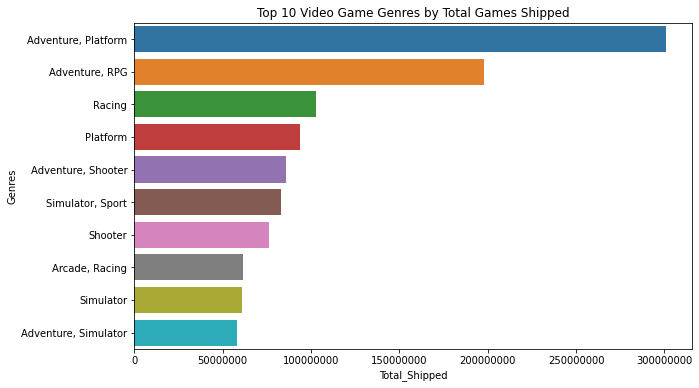

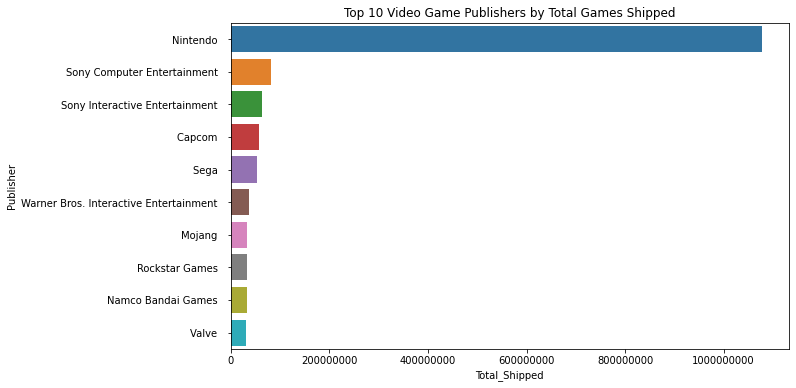

In [37]:
#Plot the top 10 platforms, genres and publishers by total_shipped using a bar chart
# top_platforms = platform_sales.head(10)
# plt.figure(figsize=(10,6))
# sns.barplot(x='total_shipped', y='console', data=top_platforms)
# plt.xlabel('Total_Shipped')
# plt.ylabel('Console')
# plt.title('Top 10 Video Game Console by Total Games Shipped')
# plt.show()

top_genres = genre_sales.head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='total_shipped', y='Genres_Clean', data=top_genres)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Total_Shipped')
plt.ylabel('Genres')
plt.title('Top 10 Video Game Genres by Total Games Shipped')
plt.show()

top_publishers = publisher_sales.head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='total_shipped', y='publisher', data=top_publishers)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Total_Shipped')
plt.ylabel('Publisher')
plt.title('Top 10 Video Game Publishers by Total Games Shipped')
plt.show()


### ANALYSIS - What are the top 10 Game Genres by Total Games Shipped?

The top 10 genres are Adventure RPG, Racing, Platform, Adventure Shooter,Simulator Sport, Shooter, Arcade Racing, Simulator and Adventure Simulator. This aligns with what I had expected. Given Minecraft, Legend of Zelda - Breathe of the Wild and Grand Theft Auto V are some of the most played games, the genres on the top 10 games makes sense. 

### ANALYSIS - What are the top 10 Video Game Publishers?

The top 10 publishers by Games Shipped are - Nintendo, Sony Computer Entertainment, Sony Interactive Entertainment, Capcorn, Sega, Warner Bros. Interactive Entertainment, Mojang, Rockstar Games, Namco Bandai Games and Valve. Given the previous analysis on the Game by Genre - this analysis also makes sense. One item that has skewed our data here is Wii Sports which after further research confirmed that this game was bundled with the sale of the Wii Console. This means that this is counting the sale of the physical console causing our plot for nintendo to be skewed. Looking at the raw dataset, Pokemon is one of the highest shipped games which gets produced for Nintendo consoles, so this makes sense!

For the next part of the analysis, we will group the dataset by platform, genre and publisher to calculate the total ships for each combination and then sort it by descending order of ships. 

In [38]:
#Group the dataset by platform, genre, publisher and calculating the total shipped for each combination
pgp_sales = df5.groupby(['console', 'Genres_Clean', 'publisher'])['total_shipped'].sum().reset_index()

#Sort the combinations in descending order of ships
pgp_sales = pgp_sales.sort_values('total_shipped', ascending=False)

pgp_sales = pgp_sales.reset_index(drop = True)
pgp_sales

,console,Genres_Clean,publisher,total_shipped
0,Wii,"Simulator, Sport",Nintendo,82900000.00
1,Wii,"Adventure, Platform",Nintendo,57060000.00
2,DS,"Adventure, Platform",Nintendo,55910000.00
3,NS,"Arcade, Racing",Nintendo,52000000.00
4,NES,"Adventure, Platform",Nintendo,47700000.00
...,...,...,...,...
366,PC,"Adventure, Indie, Puzzle",Infocom,80000.00
367,XOne,"Adventure, Indie, Platform",Yacht Club Games,80000.00
368,PSP,"Adventure, RPG",Square Enix,80000.00
369,PSP,"Adventure, RPG",Atlus,60000.00


### ANALYSIS: 

Per the initial analysis of combining the data on the Genres, Publisher and total_shipped column - some of the highest shipped out Genres in games are Simulators, Adventures and Platforms. The top 5 per the previous table all are Nintendo consoles!

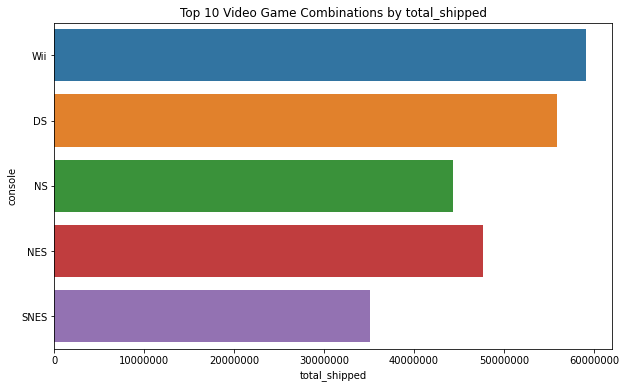

In [39]:
#Plot the top 5 combinations by total shipped and the consoles. 

top_combinations = pgp_sales.head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='total_shipped', y='console', data=top_combinations, ci= None)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('total_shipped')
plt.ylabel('console')
plt.title('Top 10 Video Game Combinations by total_shipped')
plt.show()



In [40]:
df5.columns

Index(['Title', 'Global_Plays', 'Release Date', 'position', 'console',
       'publisher', 'developer', 'total_shipped', 'release_date', 'Genres',
       'mean_ratings', 'Genres_Clean'],
      dtype='object')

### What are the characteristics of the most successful video games, such as their release date, developer, genre, and rating?


In [41]:
#Creating a new dataframe containing the top 100 video games by total_shipped
top_games_shipped = df5.nlargest(100, 'total_shipped')
top_games_shipped = top_games_shipped.reset_index(drop = True)
top_games_shipped

,Title,Global_Plays,Release Date,position,console,publisher,developer,total_shipped,release_date,Genres,mean_ratings,Genres_Clean
0,Wii Sports,55077.00,19-Nov-06,27,Wii,Nintendo,Nintendo EAD,82900000.00,19th Nov 06,"['Simulator', 'Sport']",3.70,"Simulator, Sport"
1,Mario Kart 8 Deluxe,20486.00,28-Apr-17,55,NS,Nintendo,Nintendo EPD,52000000.00,28th Apr 17,"['Arcade', 'Racing']",4.00,"Arcade, Racing"
2,Animal Crossing: New Horizons,23100.00,19-Mar-20,70,NS,Nintendo,Nintendo,41590000.00,20th Mar 20,['Simulator'],3.60,Simulator
3,Super Mario Bros.,18792.00,13-Sep-85,75,NES,Nintendo,Nintendo EAD,40240000.00,18th Oct 85,"['Adventure', 'Platform']",3.50,"Adventure, Platform"
4,Mario Kart Wii,58647.00,10-Apr-08,81,Wii,Nintendo,Nintendo EAD,37380000.00,27th Apr 08,['Racing'],3.90,Racing
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Super Smash Bros.,20198.00,21-Jan-99,673,N64,Nintendo,HAL Laboratory,5550000.00,26th Apr 99,"['Fighting', 'Platform']",3.40,"Fighting, Platform"
96,Detroit: Become Human,13416.00,25-May-18,679,PS4,Sony Interactive Entertainment,Quantic Dream,5500000.00,25th May 18,"['Adventure', 'Puzzle']",3.50,"Adventure, Puzzle"
97,Final Fantasy IX,10750.00,07-Jul-00,681,PS,Square,SquareSoft,5500000.00,13th Nov 00,"['RPG', 'Turn Based Strategy']",4.30,"RPG, Turn Based Strategy"
98,Pokémon Stadium,5785.00,30-Apr-99,686,N64,Nintendo,HAL Laboratory,5460000.00,06th Mar 00,"['RPG', 'Turn Based Strategy']",3.30,"RPG, Turn Based Strategy"


In [42]:
top_games_shipped.columns

Index(['Title', 'Global_Plays', 'Release Date', 'position', 'console',
       'publisher', 'developer', 'total_shipped', 'release_date', 'Genres',
       'mean_ratings', 'Genres_Clean'],
      dtype='object')

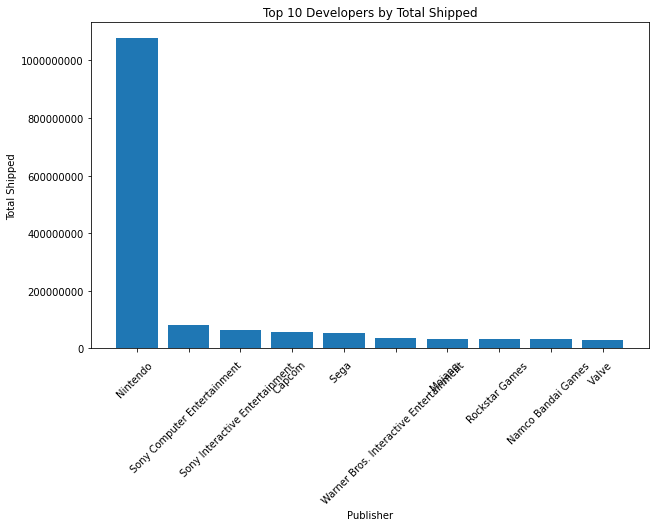

In [43]:
#plot the top 10 developers by total sales using a bar chart

# group data by developer and get total sales for each developer
publisher_sales = df5.groupby('publisher')['total_shipped'].sum().nlargest(10)

# plot bar chart of top 10 developers by sales
plt.figure(figsize=(10, 6))
plt.bar(publisher_sales.index, publisher_sales.values)
plt.xticks(rotation=45) # rotate x-axis labels
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Publisher')
plt.ylabel('Total Shipped')
plt.title('Top 10 Developers by Total Shipped')
plt.show()

Like the previous analysis, this was expected!Nintendo was one of the highest consoles where games were shipped. 

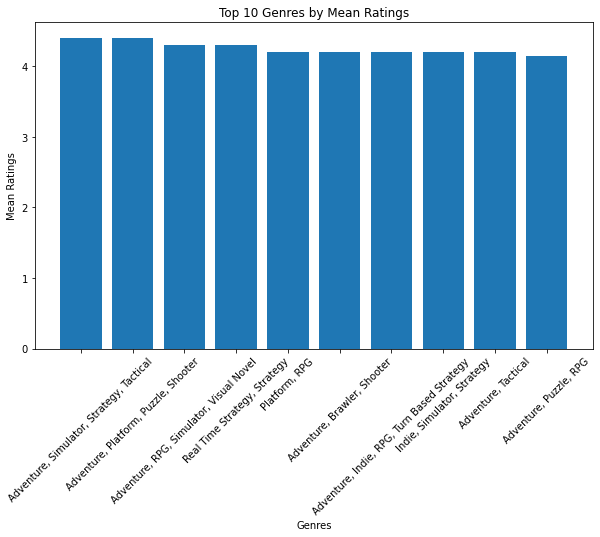

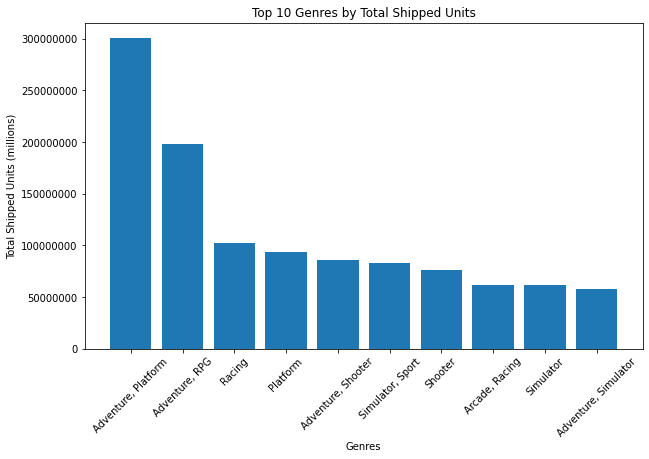

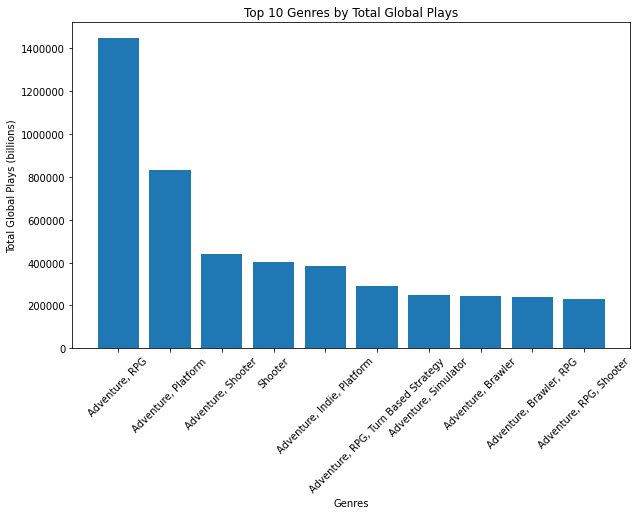

In [44]:
# calculate mean ratings for each genre
mean_ratings_by_genre = df5.groupby('Genres_Clean')['mean_ratings'].mean().sort_values(ascending=False)
top_10_ratings_genres = mean_ratings_by_genre.head(10)

# plot bar chart of top 10 genres by ratings
plt.figure(figsize=(10,6))
plt.bar(top_10_ratings_genres.index, top_10_ratings_genres.values)
plt.xticks(rotation=45) # rotate x-axis labels
plt.xlabel('Genres')
plt.ylabel('Mean Ratings')
plt.title('Top 10 Genres by Mean Ratings')
plt.show()

# calculate total shipped units for each genre
total_shipped_by_genre = df5.groupby('Genres_Clean')['total_shipped'].sum().sort_values(ascending=False)
top_10_shipped_genres = total_shipped_by_genre.head(10)

# plot bar chart of top 10 genres by shipped units
plt.figure(figsize=(10,6))
plt.bar(top_10_shipped_genres.index, top_10_shipped_genres.values)
plt.xticks(rotation=45) # rotate x-axis labels
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Genres')
plt.ylabel('Total Shipped Units (millions)')
plt.title('Top 10 Genres by Total Shipped Units')
plt.show()

# calculate total global plays for each genre
global_plays_by_genre = df5.groupby('Genres_Clean')['Global_Plays'].sum().sort_values(ascending=False)
top_10_global_plays_genres = global_plays_by_genre.head(10)

# plot bar chart of top 10 genres by global plays
plt.figure(figsize=(10,6))
plt.bar(top_10_global_plays_genres.index, top_10_global_plays_genres.values)
plt.xticks(rotation=45) # rotate x-axis labels
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Genres')
plt.ylabel('Total Global Plays (billions)')
plt.title('Top 10 Genres by Total Global Plays')
plt.show()



Just like the previous graphs, this makes sense as some of the top rated/shipped and played games have Adventure as a Genre. Given Pokemon is one of the top shipped games and it falls under Adventure, RPG and Legend of Zelda is one of the highest played games and it also falls under Adventure, RPG - Adventure , RPG being the top makes sense combining it with the total plays. 

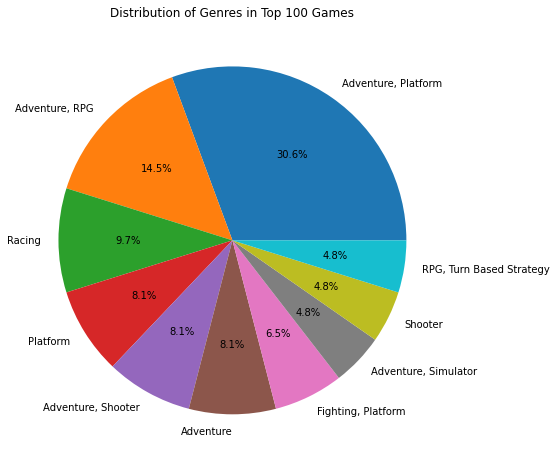

In [45]:
#Plot the Genres of the top 100 games using a pie chart

genre_counts = top_games_shipped['Genres_Clean'].value_counts().head(10)

# plot pie chart of genre distribution
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Genres in Top 100 Games')
plt.show()


### ANALYSIS - 

This graph tells us that majority of the video games that are popular or most played/shipped belong to the Adventure, Platform category followed by Adventure RPG and Racing!

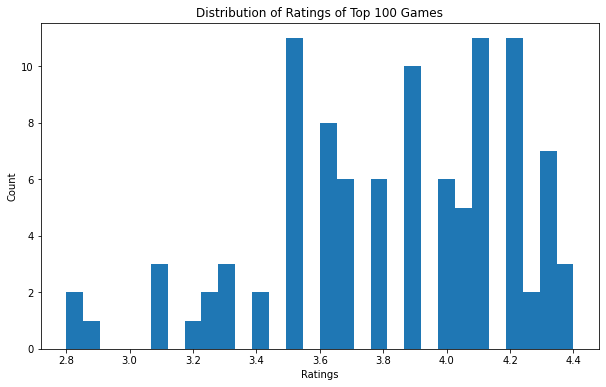

In [46]:
# plot histogram of ratings distribution
plt.figure(figsize=(10, 6))
plt.hist(top_games_shipped['mean_ratings'], bins=30)
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Distribution of Ratings of Top 100 Games')
plt.show()

### ANALYSIS

The top 100 games sorted by the number of games shipped have most of the ratings between 3.5 stars to 4.2 stars, which makes sense to me. People would not be buying the game if they did not enjoy it - which explains that median of the rating is between 3.5 starts and 4.2 stars for the top 100 games. 

### Can we predict the success or sales of a video game based on its features like genre, platform, developer, and rating?



In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


In [48]:
#Preparing the data selecting the relevant information
features = ['Genres_Clean', 'console', 'publisher', 'mean_ratings']
X = df5[features]
y = df5['total_shipped']

#Convert categorical features into dummy variables
X = pd.get_dummies(X, drop_first=True)

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the model using a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#make predictions on the testing set
y_pred = model.predict(X_test)

#Evaluate based on R-Squared metric
r2 = r2_score(y_test, y_pred)
print("R-squared value: {:.2f}".format(r2))




R-squared value: -0.03


**R-squared: **  R-squared is the co-efficient of determination. It is the statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the variance in the independent variable. 

In our case, our variables are - Genres_Clean, console, publisher, mean_ratings and total_shipped. Total_shipped is our dependent variable while the rest are our independent variable. 

The R-squared of this model is -0.03, which is equivalent to -3%. This means that -3% of the variation in total_shipped can be explained by variation in Genres_Clean, console, publisher and mean_ratings. 

This confirms our model does not explain the behavior of the data, since we typically prefer models with higher R-squared values since higher the R-squared, higher is the predictor variables in the model capable of explaining the variation in response. 

In [49]:
#We can also calculate what the feature importance to see which features are most important for predicting global ships

importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False).reset_index(drop=True)
feature_importances.head(10)


,Feature,Importance
0,"Genres_Clean_Simulator, Sport",0.30
1,mean_ratings,0.12
2,"Genres_Clean_Arcade, Racing",0.09
3,publisher_Nintendo,0.06
4,"Genres_Clean_Adventure, Platform",0.04
5,console_NS,0.04
6,console_NES,0.02
7,Genres_Clean_Racing,0.02
8,"Genres_Clean_Arcade, Puzzle",0.02
9,console_GB,0.02


### IMPORTANT  FEATURES IN GAMES: 

For this analysis, we have used pandas features - Feature Importance. This refers to techniques that assign a score to the input feature based on how useful they are at predicting a target variable. 

In our case, we used the different genres, ratings, publishers, consoles as the features to determine how they affect the total_shipped. 

### RESULTS: 

I found out here that the Genre --> Simulator, Sport is the most important for the game to be shipped followed by mean_ratings and then by genre --> Arcade, Racing and the publisher being Nintendo. This is all expected since some of the top games are from publisher Nintendo and one of the top selling games by Nintendo in this dataset is from Simulator, Sport.  


**LINEAR REGRESSION ANALYSIS BETWEEN GLOBAL PLAYS AND TOTAL SHIPPED. **



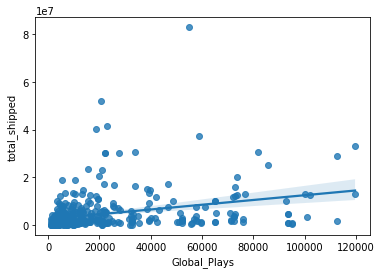

R-squared: 0.09978644517933906


In [50]:
# Conduct your analysis using seaborn's regplot function
sns.regplot(x='Global_Plays', y='total_shipped', data=df5)

# Interpret and visualize your results
plt.show()

# Calculate and print the R-squared value
slope, intercept, r_value, p_value, std_err = stats.linregress(df5['Global_Plays'], df5['total_shipped'])
print("R-squared:", r_value**2)

In this case, the R-squared value is ~ 9%, which means that 9% of the total variation in the dependent variable - total_shipped is explained by the independed variable - GLobal_Plays in this linear regression model. This means that the linear relationship between the two variables is not particularly strong, and there are most likely other factors that influence the total_shipped that we have not captured in our model. 

####  CORRELATION MATRIX


In [51]:
corr_matrix = df5.corr()
corr_matrix

,Global_Plays,position,total_shipped,mean_ratings
Global_Plays,1.00,-0.25,0.32,0.43
position,-0.25,1.00,-0.41,-0.10
total_shipped,0.32,-0.41,1.00,0.10
mean_ratings,0.43,-0.10,0.10,1.00


#### FINDINGS: 
1. The correlation between 'Global_Plays' and 'position is -0.254715, which indicates a weak negative correlation. This suggests that as the global plays of a game increases, its position in the ranking tends to decrease slightly.
2. The correlation coefficient between Global_plays and total_shipped ois 0.315890, this indicates a weak positive correlation and suggests that there is a small tendancy for games with more global plays to have higher total units shipped. 
3. The correlation coefficient between Global_plays and mean_ratings is 0.431573, which shows a moderate positive correlation. this suggests that games with higher rankings have slightly higher ratings. 
4. The correlation between position and total_shipped is -0.411117, indicating a moderate negative correlation. This suggests that games with higher rankings tend to have lower total units shipped. 
5. The correlation coefficient between position and mean_ranking is -0.095026, indicating a weak negative correlation. This suggests that there is a slight tendancy for games with higher rankings to have slightly lower mean ratings. 
6. The correlation coefficient between total_shipped and mean_ratings is 0.104160 and this indicates a weak positive correlation. This suggests that there is a small tendancy for games with higher total units shipped to have slightly higher mean ratings. 

Overall, all these results suggest that there are some weak to moderate correlation between the variables with the strongest correlation being between the variables Global_Plays and mean_ratings. 

#### SUMMARY STATISTICS

In [52]:
summary_stats = df5.describe()
# set display format to numeric format with 3 decimal places
pd.set_option('display.float_format', '{:.3f}'.format)
summary_stats

,Global_Plays,position,total_shipped,mean_ratings
count,440.000,440.000,440.000,440.000
mean,19218.393,3070.025,4466568.182,3.732
std,23906.027,3321.419,7547053.690,0.462
min,996.000,27.000,30000.000,1.600
25%,3952.000,781.750,1000000.000,3.500
50%,9209.000,2011.500,1840000.000,3.800
75%,21961.000,3606.500,4970000.000,4.100
max,119621.000,19182.000,82900000.000,4.500


Based on the output of the summary statistics, (Only including the data that matters to us - I do not care about position for this summary statistics since it does not mean anything here)

1. The Global_Plays variable has minimum value of 996, a maximum of 119,621 indicating that the most played game has been played 119,621 times. The mean value is 19,218.393, the Standard Deviation is 23,906 - indicating that the data is quite spread out. 
2. The total_shipped variable has a minimum of 30,000, a maximum value of 82,900,000 and a mean value of 4,455,568. The standard deviation is 7,547,054 indicating that the data is highly spread out. 
3. The mean_ratings variable has a minimum value of 1.6, a maximum of 4.5 and a mean value of 3.73. This tells me that the least rated game has a rating of 1.6, maximum rating of 4.5 and the mean is not far off from the maximum rating, which means that most of the games have been highly rated! The standard deviation is 0.462105 and this indicates that the data is moderately spread out. 

Additionally we can see that there are 440 observations for each variable with no missing data points.

### Grouped Analysis of mean ratings by console

In [53]:
df5.groupby('console')['mean_ratings'].mean().sort_values(ascending = False)

console
PSV    4.300
PS5    4.000
WiiU   3.990
PS4    3.986
PS     3.963
SNES   3.950
GC     3.939
GBC    3.900
PS2    3.892
X360   3.821
NS     3.816
3DS    3.812
N64    3.808
DC     3.800
DS     3.770
Wii    3.736
PC     3.640
GB     3.614
XBL    3.600
XOne   3.550
GBA    3.550
PS3    3.529
NES    3.473
2600   3.400
SCD    3.400
PSP    3.340
GEN    3.060
iOS    2.400
Name: mean_ratings, dtype: float64

**FINDINGS** 

This code computes the mean of the 'mean_ratings' column for each unique value in the 'console' column of df5. It then sorts the results in descending order. 

The resulting output here shows us the console name and the corresponding mean ratings for all the games released on the particulat console. 

From the output, we can see that the console with the highest mean rating is PSV with a rating of 4.3 followed by PS5 and WiiU with ratings of 4.0 and 3.99 respectively. On the other hand, the console/platform with the lowest rating is iOS with a rating of 2.4.

### Time Series Analysis


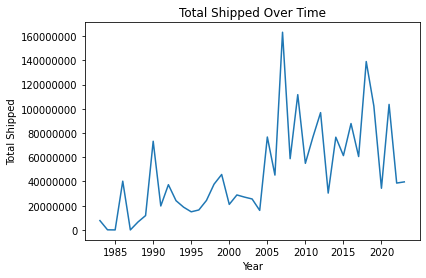

In [54]:
df6 = df5.copy()

#converting the column release_date into datetime data type

df6['release_date'] = df6['release_date'] = pd.to_datetime(df5['release_date'], errors='coerce')
df6

#setting release date column as index

df6.set_index('release_date', inplace = True)

#Resample data by year and calculate sum of total_shipped for each year
ts_data = df6['total_shipped'].resample('Y').sum()

# Plot the time series
plt.plot(ts_data.index, ts_data.values)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Year')
plt.ylabel('Total Shipped')
plt.title('Total Shipped Over Time')
plt.show()




This graph here provides us with a time series plot showing the total number of games shipped over time. Per the data we are working with, we see that there was a steady increase in the total number of games shipped from 1985 into early 2000s. However, after 2004 the industry has experienced significant increase in the number of games shipped with more frequent and higher peaks. This could be due to changes in the market, including new platforms and technologies, increase in purchasing power, increase in disposable income, shifts in consumer preferences or increased competition. 

### Let us try the same with Global Played/Total Played

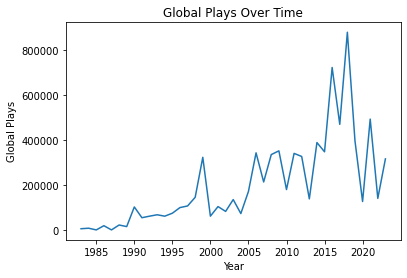

In [55]:
#Resample data by year and calculate sum of total_shipped for each year
tp_data = df6['Global_Plays'].resample('Y').sum()


# Plot the time series
plt.plot(tp_data.index, tp_data.values)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Year')
plt.ylabel('Global Plays')
plt.title('Global Plays Over Time')
plt.show()

The graph here provides us with a time series plot showing the number of total plays over time. Based on the data we are working with, we see the biggest peak in the year 2017, which is co-incidently the release of one of the most played game per the data-set - Legend of Zelda - Breathe of the Wild. Based on this, that explains why there is a sudden surge in the number of played in 2017 vs other years. 

### What quarter does most games get released in?



In [56]:
df7 = df5.copy()
df7['release_date'] = df7['release_date'] = pd.to_datetime(df7['release_date'], errors='coerce')
df7 = df7.reset_index(drop = True)
df7

,Title,Global_Plays,Release Date,position,console,publisher,developer,total_shipped,release_date,Genres,mean_ratings,Genres_Clean
0,Minecraft,119621.000,18-Nov-11,92,PC,Mojang,Mojang AB,33150000.000,2010-05-10,"['Adventure', 'Simulator']",4.250,"Adventure, Simulator"
1,Minecraft,119621.000,18-Nov-11,296,X360,Microsoft Studios,Mojang,13000000.000,2013-06-04,"['Adventure', 'Simulator']",4.250,"Adventure, Simulator"
2,The Legend of Zelda: Breath of the Wild,112500.000,03-Mar-17,118,NS,Nintendo,Nintendo EPD,29000000.000,2017-03-03,"['Adventure', 'RPG']",4.400,"Adventure, RPG"
3,The Legend of Zelda: Breath of the Wild,112500.000,03-Mar-17,2152,WiiU,Nintendo,Nintendo EPD,1700000.000,2017-03-03,"['Adventure', 'RPG']",4.400,"Adventure, RPG"
4,Grand Theft Auto V,102087.000,17-Sep-13,303,PC,Rockstar Games,Rockstar North,12600000.000,2015-04-14,"['Adventure', 'Shooter']",3.800,"Adventure, Shooter"
...,...,...,...,...,...,...,...,...,...,...,...,...
435,Pokémon Rumble Blast,1303.000,11-Aug-11,2594,3DS,Nintendo,Ambrella,1400000.000,2011-10-24,"['Adventure', 'Brawler', 'Fighting', 'RPG']",2.900,"Adventure, Brawler, Fighting, RPG"
436,Mario Strikers: Battle League,1204.000,10-Jun-22,1529,NS,Nintendo,Nintendo,2470000.000,2022-06-10,['Sport'],2.700,Sport
437,Mighty No. 9,1175.000,21-Jun-16,13877,PC,Deep Silver,Comcept,110000.000,2016-07-01,"['Adventure', 'Arcade', 'Platform', 'Shooter']",1.600,"Adventure, Arcade, Platform, Shooter"
438,System Shock,1145.000,22-Sep-94,11245,PC,Origin Systems,Looking Glass Studios,170000.000,1994-01-01,"['RPG', 'Shooter']",3.900,"RPG, Shooter"


In [57]:
df7['release_date'] = pd.to_datetime(df7['release_date'], format='%Y-%m-%d')

# Extract the quarter from the Release Date column and store in a new column
df7['Quarter'] = df7['release_date'].dt.quarter

# Group the data by quarter and count the number of releases
quarter_count = df7.groupby('Quarter')['Title'].count()

# Find the quarter with the highest number of releases
max_quarter = quarter_count.idxmax()
max_quarter = int(max_quarter)

print(f"The quarter with the highest number of releases is Quarter {max_quarter}")

The quarter with the highest number of releases is Quarter 4


## CONCLUSION: 

I understand that the data I am working with might not represent the actual scenario, but I am working with what I have and my analysis is based off on the data that was pulled as a part of the project. 

For the purpose of the project, I analysed the following questions and found the answers - 

**What are the most popular video games of all time, and how has their popularity changed over time?**

Some of the top games of all time are - Minecraft, Legend of Zelda - BOTW, Doom, GTA-V and undertale based on the number of times each of these games have been played. 

**How does the popularity of a video game vary across different platforms, genres and publishers?**
We found out here that the most popular genre is Adventure of some sort and sports. The most popular publisher is Nintendo and some of the most popular consoles are also of Nintendo's! 

**What are the characterstics of the most successful video games, such as their release date, developer, genre and ratings?**
We found out here that some of the most successful video games' genre are Simulator, Sports. The other factors that contribute for the games to be successful would be the mean_ratings have to be high, arcade, racing genre has also shown to be successful. And some of the most successful games have been published by Nintendo. 

**Can we predict the success or sales of a video game based on its features like genre, platform, developer and rating?**
We ran some R-squared tests and found out that our independent variables and dependent variables had a very low to moderate R-squared value suggesting that we would need to consider more factors in order to make a final prediction on if a game would be successful or not. 

**What is the quarter where most games are shipped?**
Most of the video games are shipped in Q4. 

